In [203]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [237]:
#畫圖設定
font = {    'size'   : 18}
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.
matplotlib.rc('font', **font)

### 資料註解
- df1: rename columes
- df2: remove extreme value from df1
- df3: replace extrem values in df1(>16000&&=0) with mean in df2
- df4: sub df of df3. Weekday = 1~5
- df4ss: sub df of df3. Weekday = 6~7 (ss for saturday and sunday)


In [204]:
df = pd.read_csv('../data/tien_byday_160901_170831.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,weekday,時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
0,4,2016/9/1,北區,光電大樓,主迴路,教學,13212.75
1,5,2016/9/2,北區,光電大樓,主迴路,教學,13260.69
2,6,2016/9/3,北區,光電大樓,主迴路,教學,11846.91
3,7,2016/9/4,北區,光電大樓,主迴路,教學,11509.22
4,1,2016/9/5,北區,光電大樓,主迴路,教學,13737.50


## DF1: 更改了Columns Name

In [205]:
#更改欄位名
df1 = df.rename(index=str, columns={'時  間':"date",'用電量(單位:度)':"Usage",'迴 路 別':'loop','用電別':'types','區 域':'area','館 舍 別':'bd_name'}) 
df1.columns


Index(['weekday', 'date', 'area', 'bd_name', 'loop', 'types', 'Usage'], dtype='object')

In [206]:
#離群值
df1[df1.Usage>16000].Usage

143    613240.9
Name: Usage, dtype: float64

In [207]:
#缺值
df1[df1.Usage == 0] 
#缺了65筆有點問題！

,weekday,date,area,bd_name,loop,types,Usage
78,5,2016/11/18,北區,光電大樓,主迴路,教學,0.0
79,6,2016/11/19,北區,光電大樓,主迴路,教學,0.0
80,7,2016/11/20,北區,光電大樓,主迴路,教學,0.0
81,1,2016/11/21,北區,光電大樓,主迴路,教學,0.0
82,2,2016/11/22,北區,光電大樓,主迴路,教學,0.0
83,3,2016/11/23,北區,光電大樓,主迴路,教學,0.0
84,4,2016/11/24,北區,光電大樓,主迴路,教學,0.0
85,5,2016/11/25,北區,光電大樓,主迴路,教學,0.0
86,6,2016/11/26,北區,光電大樓,主迴路,教學,0.0
87,7,2016/11/27,北區,光電大樓,主迴路,教學,0.0


In [208]:
#扣掉極值後的統計
#將新的資料集（扣掉離群）稱為df2
df2 = df1[df1.Usage >0]
df2 = df2[df2.Usage < 16000]
df2.Usage.describe()
#df2.Usage.nlargest(n=10) #最大的十個

count      299.000000
mean     11182.205452
std       2192.191996
min       4820.250000
25%       9634.755000
50%      11509.880000
75%      12964.695000
max      14574.000000
Name: Usage, dtype: float64

看得出來扣掉離群值後，數字比較正常

In [209]:
#創建df3，把df1的極值補成df2的平均
df3 = df1
df3 = df3.replace(0.0,df2.Usage.mean())
df3 = df3.replace(613240.9,df2.Usage.mean())
df3.describe()

,weekday,Usage
count,365.0,365.000000
mean,4.0,11182.205452
std,2.0,1983.517461
min,1.0,4820.250000
25%,2.0,9976.380000
50%,4.0,11182.205452
75%,6.0,12738.000000
max,7.0,14574.000000


In [210]:
df3.corr() #看相關係數

,weekday,Usage
weekday,1.000000,-0.209782
Usage,-0.209782,1.000000


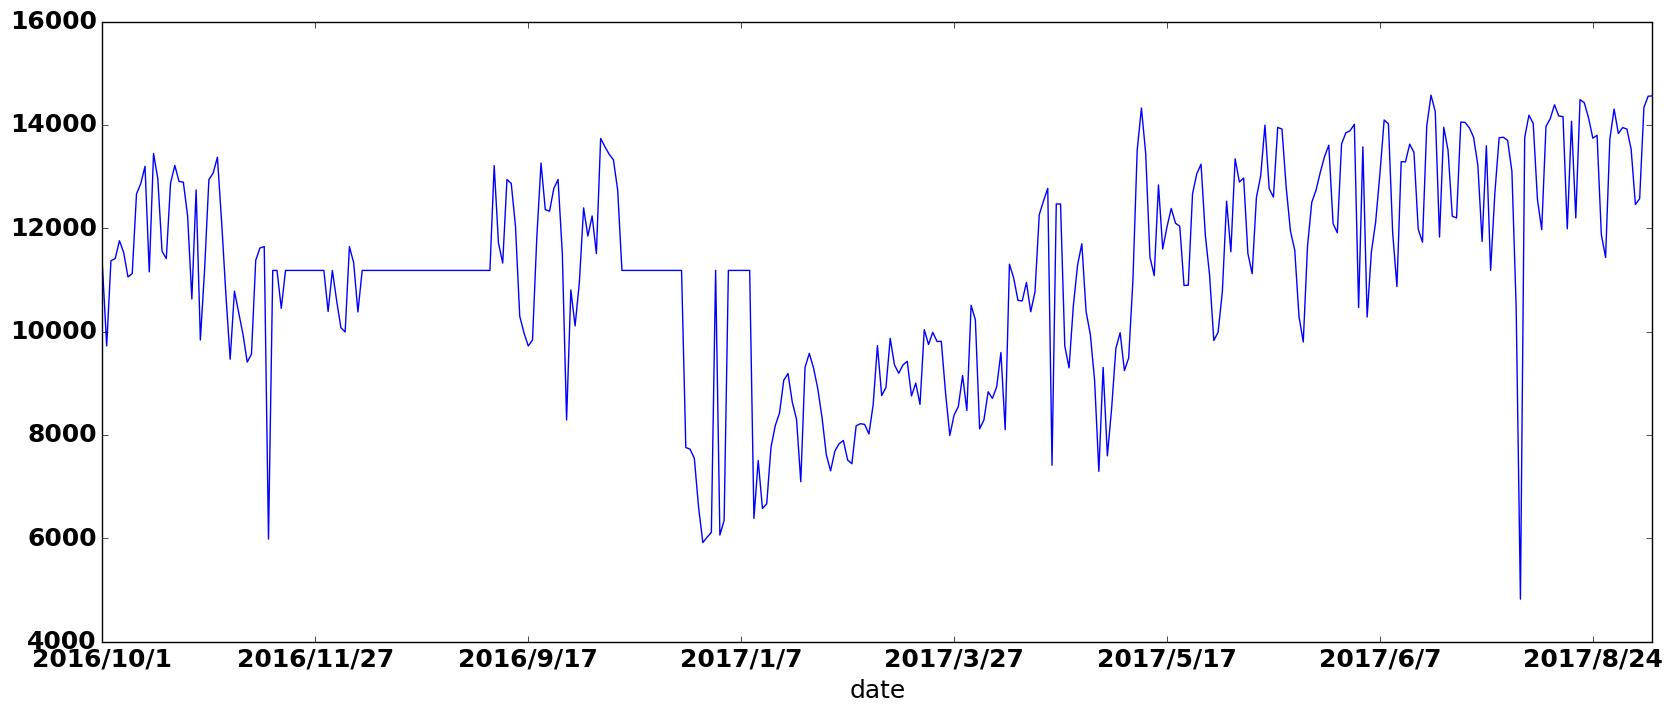

In [238]:
#每個月的用電量
df3.groupby('date').Usage.mean().plot.line()

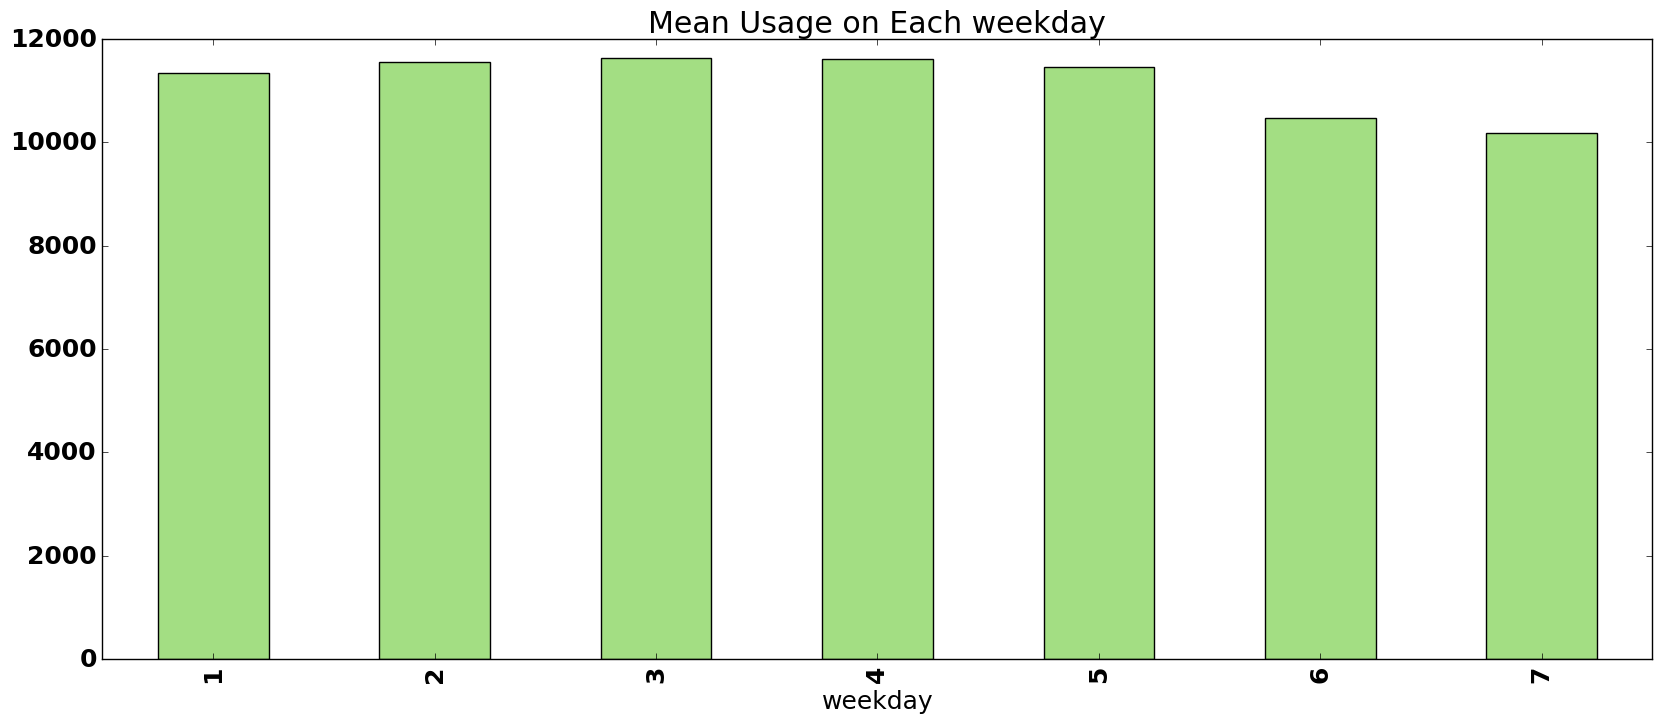

In [239]:


df3.groupby('weekday').Usage.mean().plot.bar(color='#A3DE83')
matplotlib.pyplot.title('Mean Usage on Each weekday')
savefig('fig_Mean Usage on Each weekday_tien')

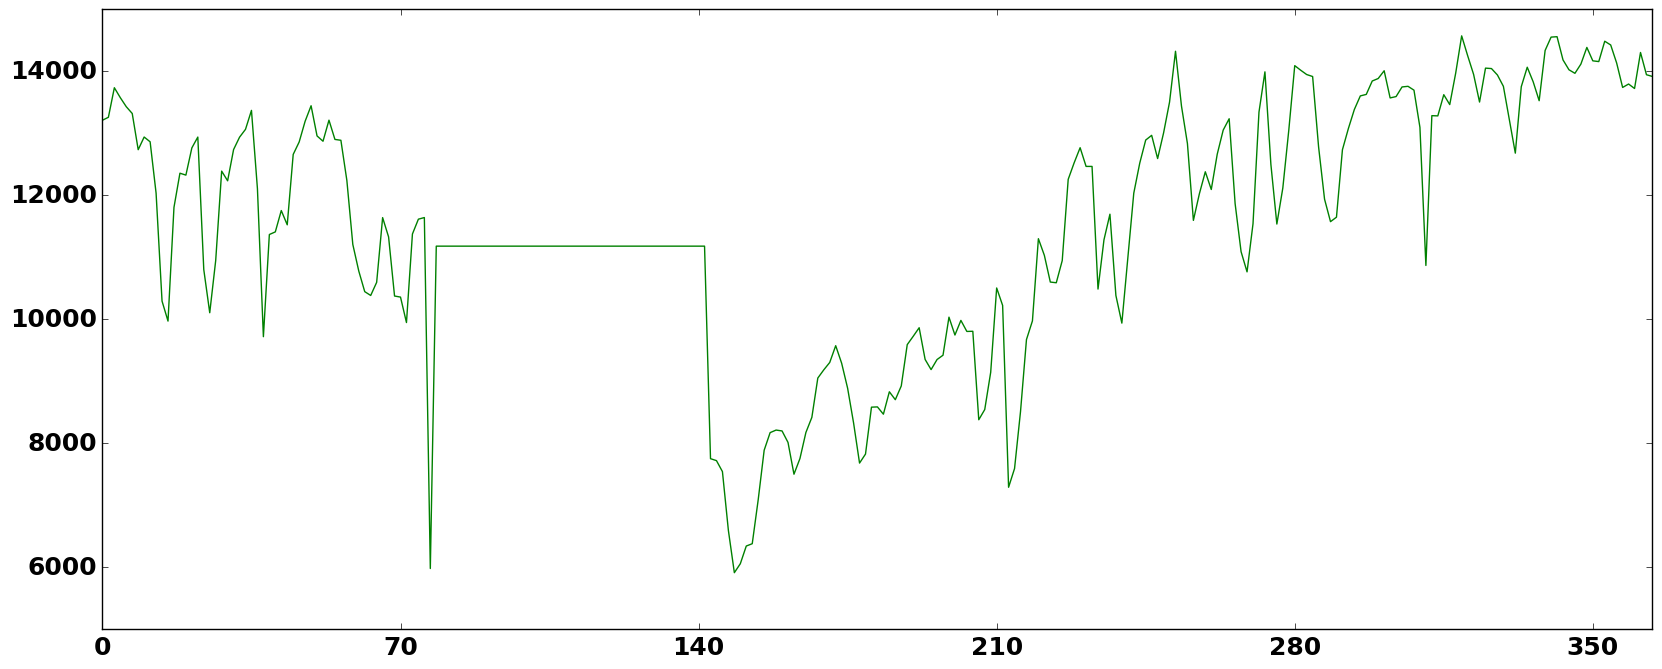

In [213]:

df4 = df3[(df3.weekday != 6)]
df4 = df4[(df4.weekday != 7)]
df4.Usage.plot(color='g')

#df4.sort_values('Usage')['Usage'].plot()


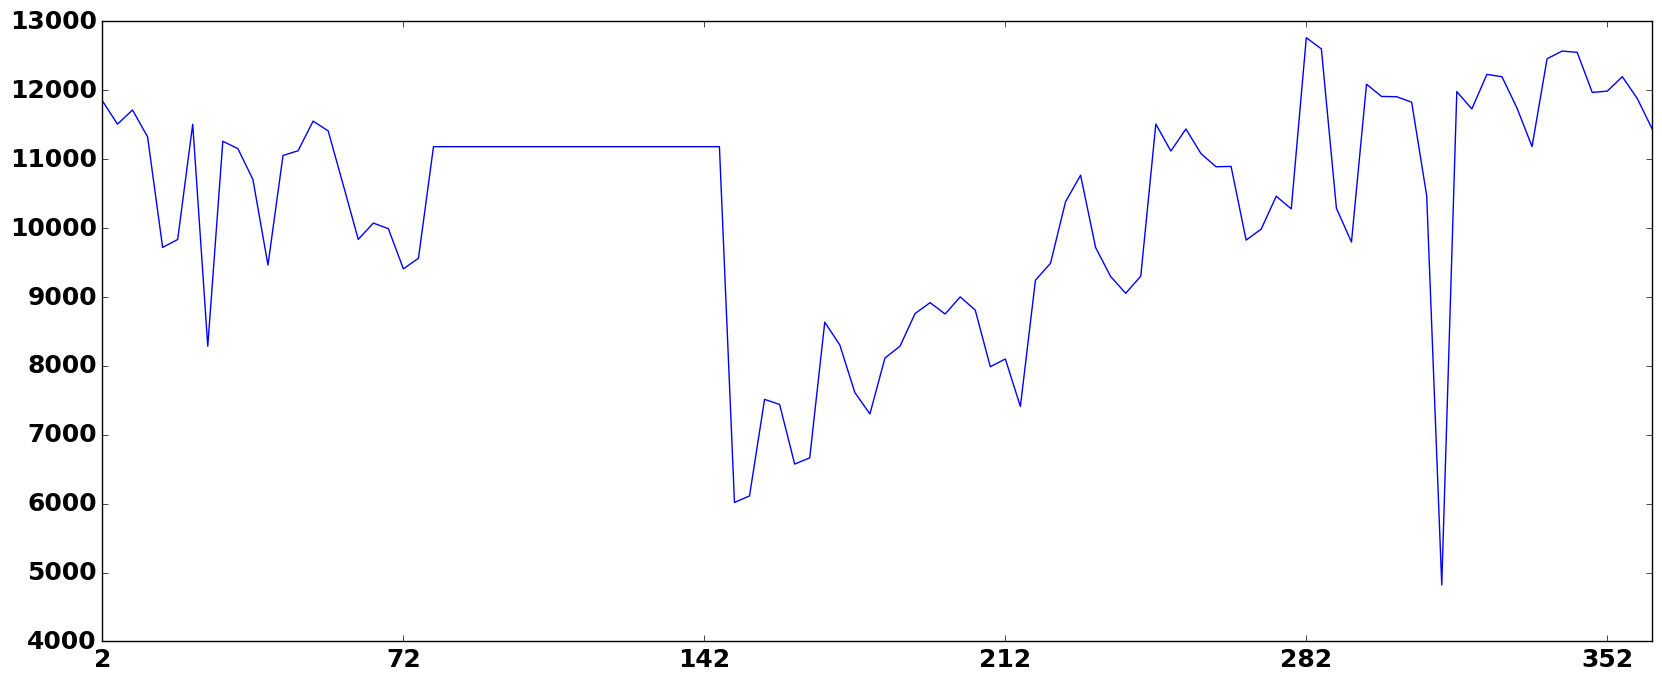

In [214]:
df4ss = df3[(df3.weekday != 1)]
df4ss = df4ss[(df4ss.weekday != 2)]
df4ss = df4ss[(df4ss.weekday != 3)]
df4ss = df4ss[(df4ss.weekday != 4)]
df4ss = df4ss[(df4ss.weekday != 5)]
df4ss.Usage.plot()

In [215]:
#發現上面有一天超少
df4ss[df4ss.Usage < 7000]

,weekday,date,area,bd_name,loop,types,Usage
149,6,2017/1/28,北區,光電大樓,主迴路,教學,6017.25
150,7,2017/1/29,北區,光電大樓,主迴路,教學,6112.31
163,6,2017/2/11,北區,光電大樓,主迴路,教學,6574.94
164,7,2017/2/12,北區,光電大樓,主迴路,教學,6664.69
311,7,2017/7/9,北區,光電大樓,主迴路,教學,4820.25


In [216]:
df4[df4.Usage < 7000]

,weekday,date,area,bd_name,loop,types,Usage
77,4,2016/11/17,北區,光電大樓,主迴路,教學,5982.97
147,4,2017/1/26,北區,光電大樓,主迴路,教學,6596.06
148,5,2017/1/27,北區,光電大樓,主迴路,教學,5915.50
151,1,2017/1/30,北區,光電大樓,主迴路,教學,6059.88
152,2,2017/1/31,北區,光電大樓,主迴路,教學,6345.38
153,3,2017/2/1,北區,光電大樓,主迴路,教學,6382.69


看起來寒假比較少用電！來看看

In [217]:
print(df3.Usage.mean())



11182.205451505


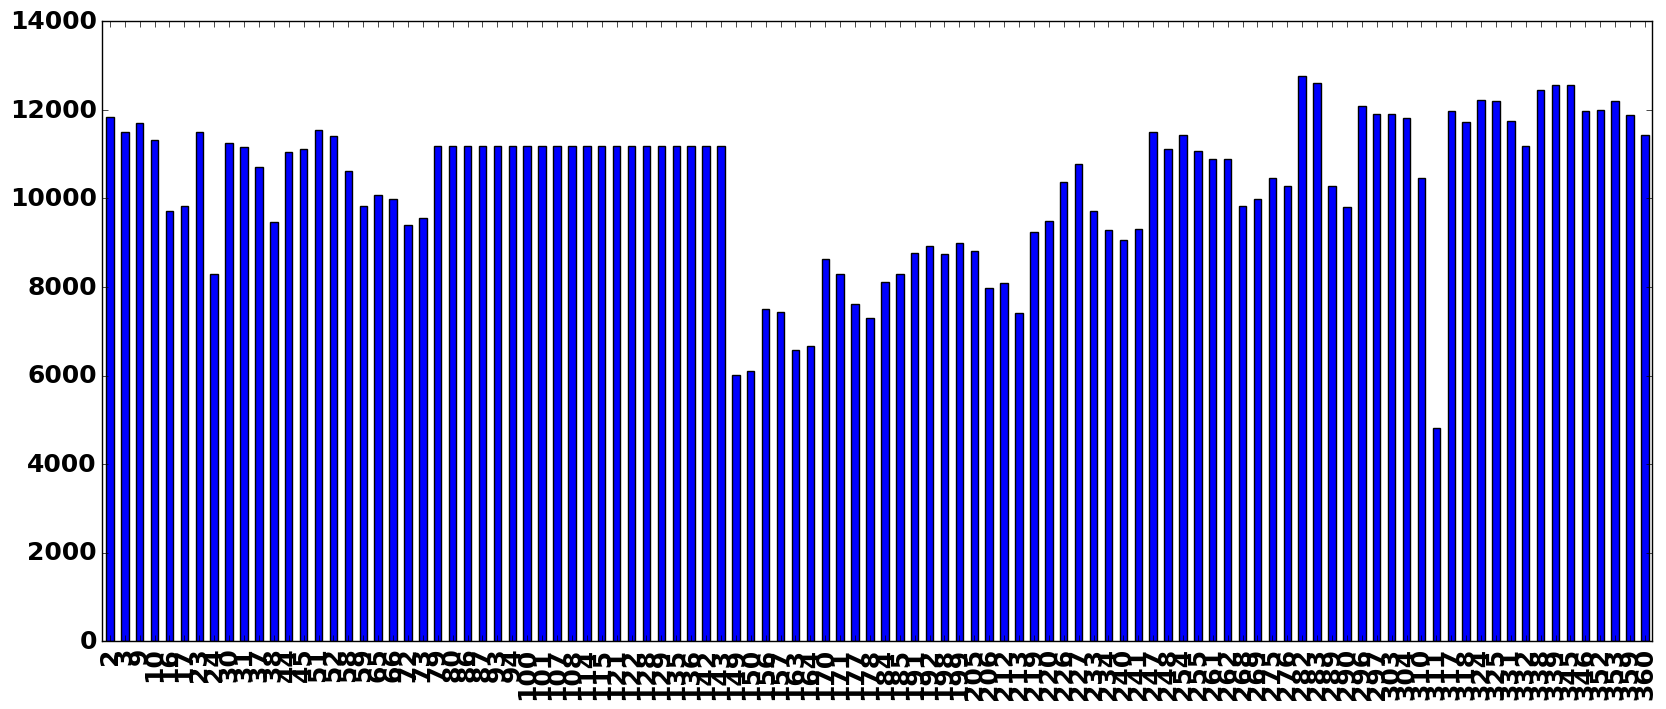

In [218]:
df4ss.Usage.plot.bar()

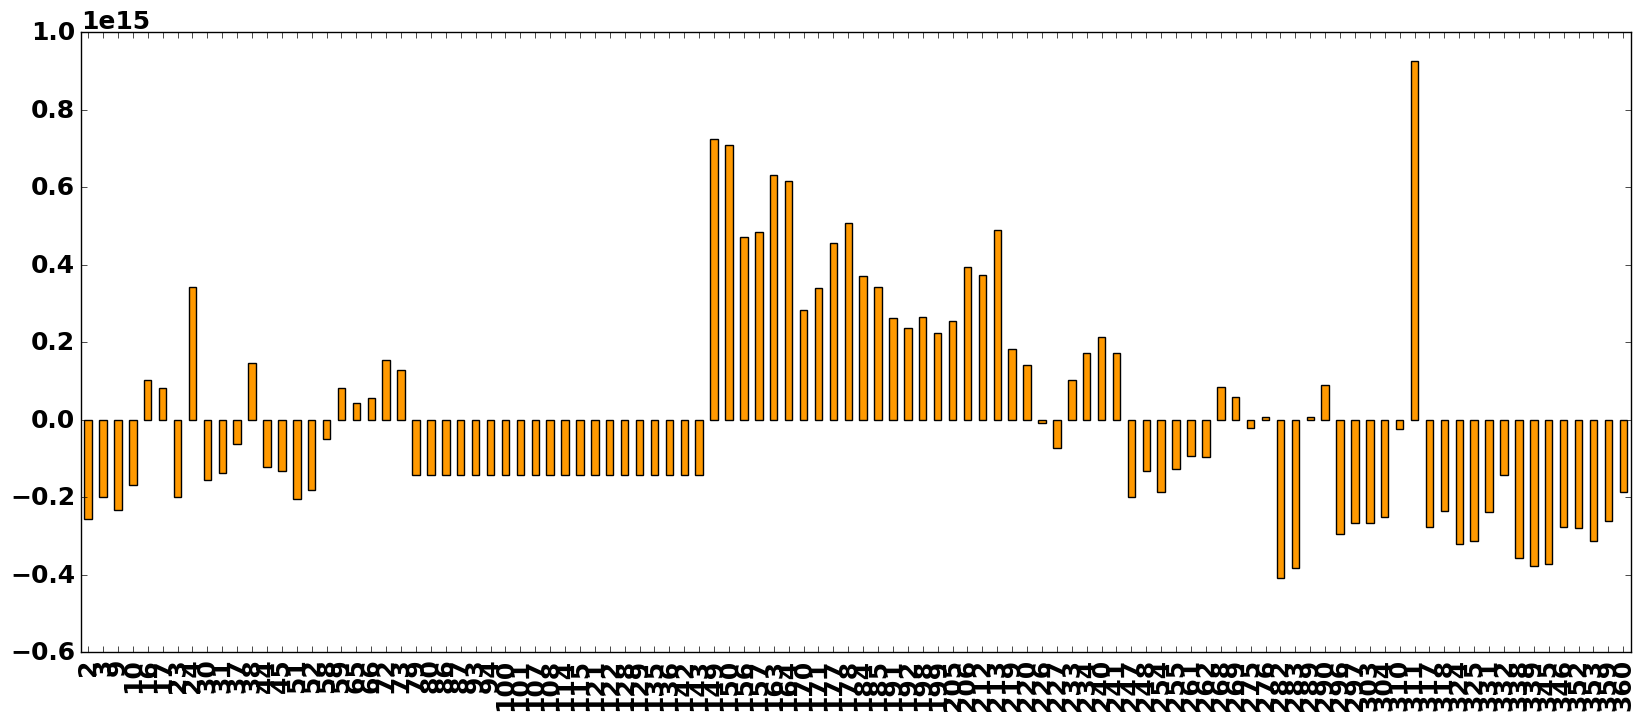

In [252]:
df4ss_m = df4ss
df4ss_m.Usage = (df4ss.Usage/df4ss_m.Usage.mean()-1)
df4ss_m.Usage.plot.bar(color='#FF9900')
#.plot.bar()

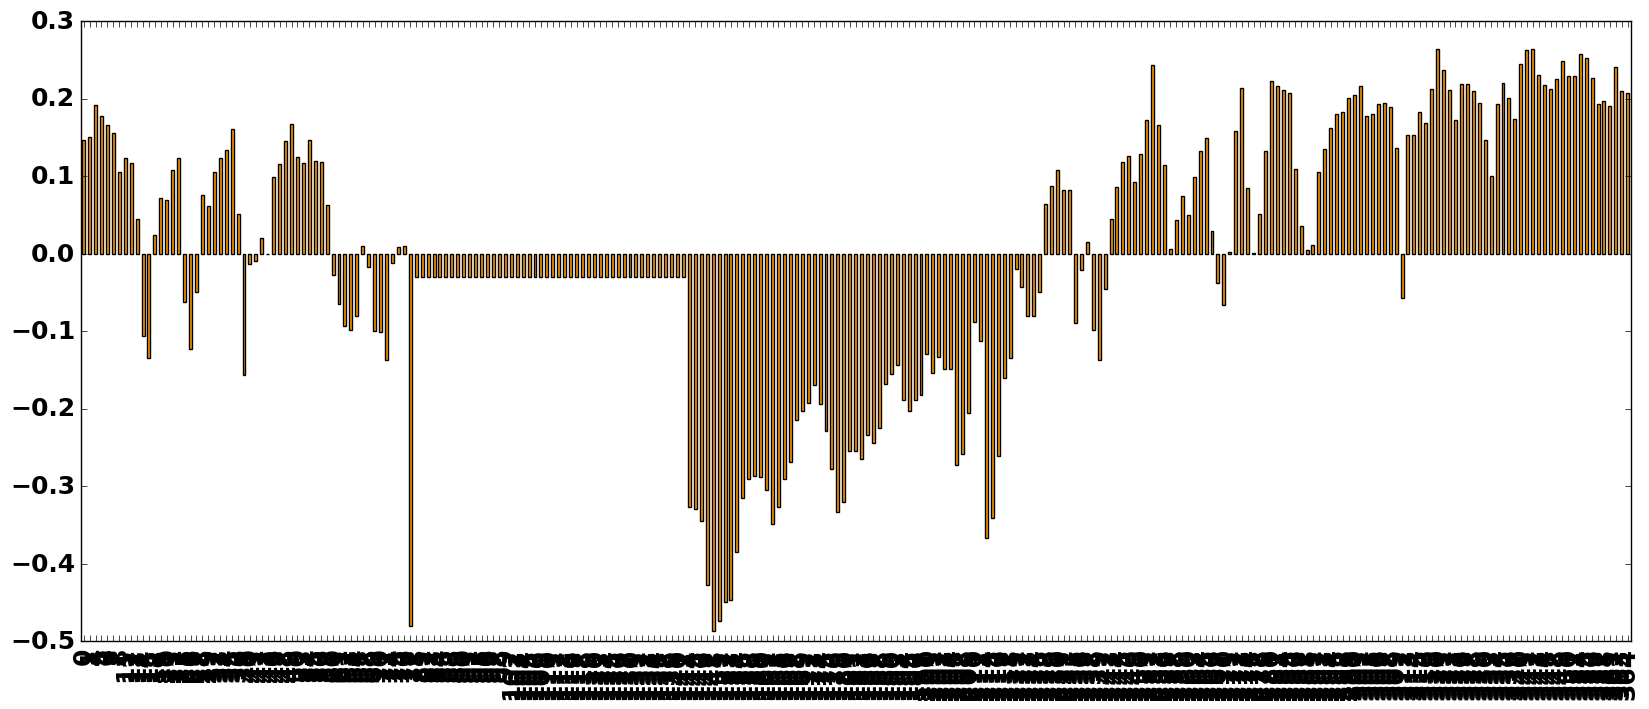

In [253]:
df4_m = df4
df4_m.Usage = (df4.Usage/df4_m.Usage.mean()-1)
df4_m.Usage.plot.bar(color='#FF9900')
#.plot.bar()

In [274]:
#aha! 這些是DF4低於平均的日期
print('lower: ',df4_m[df4_m.Usage<0].date.count())
#df4_m[df4_m.Usage<0].date

#aha! 這些是DF4高於平均的日期
print('higher: ',df4_m[df4_m.Usage>0].date.count())
#df4_m[df4_m.Usage>0].date


lower:  133
higher:  128


In [275]:

#aha! 這些是DF4_ss低於平均的日期
print('lower: ',df4ss_m[df4ss_m.Usage<0].date.count())
#df4ss_m[df4ss_m.Usage<0].date

#aha! 這些是DF4_ss高於平均的日期
print('higher: ',df4ss_m[df4ss_m.Usage>0].date.count())
#df4ss_m[df4ss_m.Usage>0].date

lower:  63
higher:  41


In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
weekday    365 non-null int64
date       365 non-null object
area       365 non-null object
bd_name    365 non-null object
loop       365 non-null object
types      365 non-null object
Usage      365 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 22.8+ KB


In [224]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 364
Data columns (total 7 columns):
weekday    299 non-null int64
date       299 non-null object
area       299 non-null object
bd_name    299 non-null object
loop       299 non-null object
types      299 non-null object
Usage      299 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 18.7+ KB


In [276]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 7 columns):
weekday    365 non-null int64
date       365 non-null object
area       365 non-null object
bd_name    365 non-null object
loop       365 non-null object
types      365 non-null object
Usage      365 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 22.8+ KB


In [226]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 364
Data columns (total 7 columns):
weekday    261 non-null int64
date       261 non-null object
area       261 non-null object
bd_name    261 non-null object
loop       261 non-null object
types      261 non-null object
Usage      261 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 16.3+ KB
